# The Cancer Gene Atlas Cancer (TCGA) - Liver Hepatocellular Carcinoma (LIHC)

Author: Moshe Silverstein <br>
Date: 7-17 <br>
Data Source: https://cancergenome.nih.gov/

In [1]:
import sys, datetime, os
import numpy as np
import pandas as pd
import importlib
import my_functions as mf
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter

In [2]:
import seaborn as sns
sns.set(color_codes=True)
np.random.seed(sum(map(ord, "distributions")))

In [3]:
from clustergrammer_widget import *
net = Network(clustergrammer_widget)

In [4]:
importlib.reload(mf)

<module 'my_functions' from '/Users/moshesilverstein/Documents/Harmonizome/TCGA/my_functions.py'>

# Versions Of Modules In Use

In [5]:
%load_ext version_information
%version_information numpy, pandas, clustergrammer_widget, seaborn 

Software versions
Python 3.5.2 64bit [GCC 4.2.1 Compatible Apple LLVM 4.2 (clang-425.0.28)]
IPython 5.3.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.13.1
pandas 0.21.0
clustergrammer_widget 1.9.0
seaborn 0.7.1
Mon Apr 30 14:56:57 2018 EDT

# Functions

In [6]:
def getGenes(inputDF):
    
    inputDF.reset_index(inplace=True)
    
    inputDF.rename(columns={'index':'Gene Symbol'}, inplace=True)

    inputDF.set_index('Gene Symbol', inplace=True)

    lst = []

    for index in  inputDF.index:
        lst.append(index.split('|')[5])

    inputDF.index = lst

In [7]:
def getSampleID(inputDF, metaDF):
    
    lst = []
    
    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()

        ID = ('-').join(metaDF.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        
        ID = ID+'-'+metaDF.loc[col, 'a_AliquotBarcode'].split('-')[3][0:2]

        lst.append(ID)

        
    inputDF.columns = lst

In [8]:
def getSampleData(inputDF, metaDF, SampleTypes):
    
    lst = []

    for i,col in enumerate(inputDF.columns):

        progressPercent = ((i+1)/len(inputDF.columns))*100

        sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(inputDF.columns)))
        sys.stdout.flush()
        
#         ID = ('-').join(meta.loc[col, 'a_AliquotBarcode'].split('-')[0:3])
        ID = ('-').join(col.split('-')[0:3])
        
        donor = 'Donor:'+ID
        
#         if '01' in str(col.split('-')[3]):
#             sampleType = 'Primary Solid Tumor'
#         elif '11' in str(col.split('-')[3]):
#             sampleType= 'Solid Tissue Normal'
        
        if ID in metaDF.index:
            info = (donor, 
                'Age:'+str(metaDF.loc[ID, 'age_at_initial_pathologic_diagnosis']),
                'Gender:'+str(metaDF.loc[ID, 'gender']),    
                'SampleType:'+SampleTypes[str(col.split('-')[3])],
                'Stage:'+str(metaDF.loc[ID, 'pathologic_stage']),
                'Histology:'+str(metaDF.loc[ID, 'histological_type']),
                'Tissue:'+str(metaDF.loc[ID, 'tumor_tissue_site']), 
                'Tumor:'+str(metaDF.loc[ID, 'tumor_type']),    
                'Grade'+str(metaDF.loc[ID, 'neoplasm_histologic_grade'])
#                 'SampleType:'+str(ID.split('-')[3])
               )
#             for col in metaDF.columns:
#                 if len(metaDF[col].dropna()) >= .5*len(metaDF[col]) and len(metaDF[col].unique()) > 2 and len(metaDF[col].unique()) < len(metaDF[col]) and 'age' not in col:
#                     info = info + (str(col)+':'+str(metaDF.loc[ID, col]),)
        lst.append(info)

        
    inputDF.columns = lst

In [9]:
SampleTypes ={
    '01':'Primary Solid Tumor',
    '02':'Recurrent Solid Tumor',
    '03':'Primary Blood Derived Cancer - Peripheral Blood',
    '04':'Recurrent Blood Derived Cancer - Bone Marrow',
    '05':'Additional - New Primary',
    '06':'Metastatic',
    '07':'Additional Metastatic',
    '08':'Human Tumor Original Cells',
    '09':'Primary Blood Derived Cancer - Bone Marrow',
    '10':'Blood Derived Normal',
    '11':'Solid Tissue Normal',
    '12':'Buccal Cell Normal',
    '13':'EBV Immortalized Normal',
    '14':'Bone Marrow Normal',
    '15':'sample type 15',
    '16':'sample type 16',
    '20':'Control Analyte',
    '40':'Recurrent Blood Derived Cancer - Peripheral Blood',
    '50':'Cell Lines',
    '60':'Primary Xenograft Tissue',
    '61':'Cell Line Derived Xenograft Tissue',
    '99':'sample type 99'
             }

# Path to Output Files

In [10]:
path = '/Users/moshesilverstein/Documents/Harmonizome/TCGA/Output/'

# Load Meta Data

In [11]:
meta = pd.read_csv('Input/TCGA_Metadata.csv', index_col=9)

In [12]:
meta.head()

,a_AliquotBarcode,b_disease,a_objectSizeBytes,b_uploaded,b_state,b_library_type,b_center,b_assembly,a_GCSobject
a_CGHubAnalysisID,,,,,,,,,
3a8e6a74-137f-468f-8987-fa0acdde2836,TCGA-CS-6188-01A-11R-1896-07,LGG,6354301047,8/14/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
c63d44f1-c9ad-4391-b1aa-0feb3713441b,TCGA-EO-A22Y-01A-11R-A180-07,UCEC,5497637066,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
21912089-1e42-4bcc-9ad9-fe9a9b88fb09,TCGA-94-A5I4-01A-11R-A26W-07,LUSC,4600317850,8/29/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
6b86e544-0372-434a-9f28-6fa4075dd228,TCGA-N5-A4RV-01A-21R-A28V-07,UCS,4964387768,8/30/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...
30518eb4-2783-4988-bcd4-36a1a8bb4dfa,TCGA-BK-A56F-01A-32R-A27V-07,UCEC,5668623460,8/31/2013,Live,RNA-Seq,UNC-LCCC,unaligned,gs://5aa919de-0aa0-43ec-9ec3-288481102b6d/tcga...


In [13]:
meta.shape

(11373, 9)

# Load Sample MetaData

In [14]:
sample_meta = pd.read_csv('Input/metadata_Liver hepatocellular carcinoma [LIHC]', sep='\t', index_col=1)

In [15]:
sample_meta.head()

,Unnamed: 0,Study,Project,ParticipantUUID,TSSCode,age_at_initial_pathologic_diagnosis,anatomic_neoplasm_subdivision,batch_number,bcr,clinical_M,...,BMI,age_began_smoking_in_years,h_pylori_infection,other_dx,other_malignancy_anatomic_site,other_malignancy_histological_type,other_malignancy_malignancy_type,stopped_smoking_year,venous_invasion,year_of_tobacco_smoking_onset
ParticipantBarcode,,,,,,,,,,,,,,,,,,,,,
TCGA-2V-A95S,3017,LIHC,TCGA,2C041473-EAAA-4B7C-9B2E-B9DA3543AD18,2V,NaN,NaN,384,Nationwide Children's Hospital,NaN,...,26.1,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2Y-A9GY,3018,LIHC,TCGA,75030B63-59AF-4705-86E7-3A431B7CF65A,2Y,64.0,NaN,399,Nationwide Children's Hospital,NaN,...,35.5,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2Y-A9H2,3019,LIHC,TCGA,CF7F0473-EAF3-4259-A68E-475A782FC84C,2Y,64.0,NaN,399,Nationwide Children's Hospital,NaN,...,17.8,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2Y-A9H5,3020,LIHC,TCGA,51810579-E20D-4F08-93E7-891D645931DB,2Y,59.0,NaN,399,Nationwide Children's Hospital,NaN,...,28.0,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN
TCGA-2Y-A9H0,3021,LIHC,TCGA,492FF93F-432B-4B73-8706-632FB2C83EB4,2Y,49.0,NaN,399,Nationwide Children's Hospital,NaN,...,27.5,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
sample_meta.shape

(377, 70)

# Load Data

In [17]:
matrix = pd.read_csv('Input/TCGA_LIHC_tpm.tsv', sep='\t', index_col=0)

In [18]:
matrix.head()

,863c22e7-68d4-474b-9780-81e59fd04d81,2ba6f8c2-2ac5-45a9-9340-aaa137ba098c,b6557da2-17f0-4661-85ca-443d2a6015e8,2e3c0a88-0b14-4d16-9b34-49661a4ec955,9d0a19a3-8337-49eb-8a97-ac3395fd25cc,ac3f6539-91ee-4f15-afa3-68af19f6928a,3a0b8166-42f3-481b-86ba-80ba7ee28270,2c1252b0-771c-4176-9e32-8fc2ff014fcc,a9c977bc-0b78-4e1d-a449-f6ce066fd914,50ebfebe-399f-4d75-ac54-a061d69251a7,...,f719f120-64e7-4fe3-a6b9-828e357bbf2d,d71b4df0-758c-4c4d-9f1c-436fdeccd618,bcc66fd3-a484-43d8-b65f-c4e649e8ac32,a71df68a-6b9c-48c1-ac73-3277323d38ca,f925e6c8-f759-4bfb-aa79-365b64313716,cfea4993-fc4f-4df8-b4c9-b290a7c6b6aa,c2d429b3-1b3e-42c0-9573-f950109aef96,efa17774-b681-4dd6-b4e6-558a72b4740d,40f0a01d-baa1-4f76-93c5-19665b2cf44f,2412173a-c3bf-477c-b8e0-641db1fc9450
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,58.1393,121.897000,61.69070,1.038290e+02,87.44260,48.851300,68.0302,243.864000,85.799500,181.0700,...,112.6180,60.735200,100.1560,1.388620e+02,80.2770,106.88800,103.96000,68.07220,79.9645,61.687200
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,16.9742,16.884800,1.61124,5.962720e+00,2.14822,23.423600,21.5137,28.279100,21.391500,15.0237,...,0.0000,7.360580,24.6492,4.817080e-07,0.0000,0.00000,6.74035,6.60907,18.6389,0.270391
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,21.1176,55.932800,8.47344,2.230360e+01,25.79520,11.618700,30.0688,32.900100,15.453200,53.6691,...,15.9982,17.004900,14.9711,1.096080e+01,31.0610,1.56664,18.96590,12.84940,21.9603,5.439120
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,27.2009,16.924900,24.67760,3.636650e+01,27.73340,26.157000,32.4845,85.126400,16.825100,34.9204,...,17.6955,36.507700,49.5057,2.260380e+01,17.8043,22.25590,58.24220,28.12390,54.4721,37.314700
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.0000,0.499995,0.00000,5.887510e-09,0.00000,0.406411,0.0000,0.819926,0.123878,0.0000,...,0.0000,0.040171,0.0000,0.000000e+00,0.0000,0.00000,0.00000,0.00000,0.0000,0.000000


In [19]:
matrix.shape

(199169, 424)

# Get Only Protein Coding Genes

In [20]:
lst = []

for i,index in enumerate(matrix.index):
    
    progressPercent = ((i+1)/len(matrix.index)*100)

    sys.stdout.write("Progress: %d%%  %d Out of %d   \r" % (progressPercent, (i+1), len(matrix.index)))
    sys.stdout.flush()
                                 
    lst.append(index.split('|')[7])    
                       
matrix['Gene Type'] = lst

matrix = matrix[matrix['Gene Type'] == 'protein_coding']

matrix.drop('Gene Type', axis=1, inplace=True)

In [21]:
matrix.head()

,863c22e7-68d4-474b-9780-81e59fd04d81,2ba6f8c2-2ac5-45a9-9340-aaa137ba098c,b6557da2-17f0-4661-85ca-443d2a6015e8,2e3c0a88-0b14-4d16-9b34-49661a4ec955,9d0a19a3-8337-49eb-8a97-ac3395fd25cc,ac3f6539-91ee-4f15-afa3-68af19f6928a,3a0b8166-42f3-481b-86ba-80ba7ee28270,2c1252b0-771c-4176-9e32-8fc2ff014fcc,a9c977bc-0b78-4e1d-a449-f6ce066fd914,50ebfebe-399f-4d75-ac54-a061d69251a7,...,f719f120-64e7-4fe3-a6b9-828e357bbf2d,d71b4df0-758c-4c4d-9f1c-436fdeccd618,bcc66fd3-a484-43d8-b65f-c4e649e8ac32,a71df68a-6b9c-48c1-ac73-3277323d38ca,f925e6c8-f759-4bfb-aa79-365b64313716,cfea4993-fc4f-4df8-b4c9-b290a7c6b6aa,c2d429b3-1b3e-42c0-9573-f950109aef96,efa17774-b681-4dd6-b4e6-558a72b4740d,40f0a01d-baa1-4f76-93c5-19665b2cf44f,2412173a-c3bf-477c-b8e0-641db1fc9450
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,58.1393,121.897000,61.69070,1.038290e+02,87.44260,48.851300,68.0302,243.864000,85.799500,181.0700,...,112.6180,60.735200,100.1560,1.388620e+02,80.2770,106.88800,103.96000,68.07220,79.9645,61.687200
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,16.9742,16.884800,1.61124,5.962720e+00,2.14822,23.423600,21.5137,28.279100,21.391500,15.0237,...,0.0000,7.360580,24.6492,4.817080e-07,0.0000,0.00000,6.74035,6.60907,18.6389,0.270391
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,21.1176,55.932800,8.47344,2.230360e+01,25.79520,11.618700,30.0688,32.900100,15.453200,53.6691,...,15.9982,17.004900,14.9711,1.096080e+01,31.0610,1.56664,18.96590,12.84940,21.9603,5.439120
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,27.2009,16.924900,24.67760,3.636650e+01,27.73340,26.157000,32.4845,85.126400,16.825100,34.9204,...,17.6955,36.507700,49.5057,2.260380e+01,17.8043,22.25590,58.24220,28.12390,54.4721,37.314700
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.0000,0.499995,0.00000,5.887510e-09,0.00000,0.406411,0.0000,0.819926,0.123878,0.0000,...,0.0000,0.040171,0.0000,0.000000e+00,0.0000,0.00000,0.00000,0.00000,0.0000,0.000000


In [22]:
matrix.shape

(79930, 424)

# Map Sample Meta Data to Sample ID

In [23]:
getSampleID(matrix, meta)

In [24]:
matrix.head()

,TCGA-BD-A3ER-01,TCGA-G3-A3CG-01,TCGA-DD-A39V-01,TCGA-EP-A3JL-01,TCGA-DD-A3A1-01,TCGA-DD-A39W-01,TCGA-DD-A1EK-01,TCGA-CC-A3MA-01,TCGA-FV-A2QR-11,TCGA-FV-A3R2-01,...,TCGA-DD-AADS-01,TCGA-DD-AADK-01,TCGA-DD-AAD0-01,TCGA-DD-AACS-01,TCGA-DD-AACJ-01,TCGA-DD-AACD-01,TCGA-DD-AAEI-01,TCGA-DD-AAE7-01,TCGA-DD-AAVW-01,TCGA-CC-A123-01
ENST00000000233.9|ENSG00000004059.10|OTTHUMG00000023246.6|OTTHUMT00000059567.2|ARF5-001|ARF5|1103|protein_coding|,58.1393,121.897000,61.69070,1.038290e+02,87.44260,48.851300,68.0302,243.864000,85.799500,181.0700,...,112.6180,60.735200,100.1560,1.388620e+02,80.2770,106.88800,103.96000,68.07220,79.9645,61.687200
ENST00000000412.7|ENSG00000003056.7|OTTHUMG00000168276.2|OTTHUMT00000399130.1|M6PR-001|M6PR|2756|protein_coding|,16.9742,16.884800,1.61124,5.962720e+00,2.14822,23.423600,21.5137,28.279100,21.391500,15.0237,...,0.0000,7.360580,24.6492,4.817080e-07,0.0000,0.00000,6.74035,6.60907,18.6389,0.270391
ENST00000000442.10|ENSG00000173153.13|OTTHUMG00000150641.6|OTTHUMT00000319303.1|ESRRA-002|ESRRA|2215|protein_coding|,21.1176,55.932800,8.47344,2.230360e+01,25.79520,11.618700,30.0688,32.900100,15.453200,53.6691,...,15.9982,17.004900,14.9711,1.096080e+01,31.0610,1.56664,18.96590,12.84940,21.9603,5.439120
ENST00000001008.5|ENSG00000004478.7|OTTHUMG00000090429.3|OTTHUMT00000206861.2|FKBP4-001|FKBP4|3732|protein_coding|,27.2009,16.924900,24.67760,3.636650e+01,27.73340,26.157000,32.4845,85.126400,16.825100,34.9204,...,17.6955,36.507700,49.5057,2.260380e+01,17.8043,22.25590,58.24220,28.12390,54.4721,37.314700
ENST00000001146.6|ENSG00000003137.8|OTTHUMG00000129756.5|OTTHUMT00000251969.1|CYP26B1-001|CYP26B1|4732|protein_coding|,0.0000,0.499995,0.00000,5.887510e-09,0.00000,0.406411,0.0000,0.819926,0.123878,0.0000,...,0.0000,0.040171,0.0000,0.000000e+00,0.0000,0.00000,0.00000,0.00000,0.0000,0.000000


# Map Gene Symbol to Gene ID

In [25]:
getGenes(matrix)

In [26]:
matrix.head()

,TCGA-BD-A3ER-01,TCGA-G3-A3CG-01,TCGA-DD-A39V-01,TCGA-EP-A3JL-01,TCGA-DD-A3A1-01,TCGA-DD-A39W-01,TCGA-DD-A1EK-01,TCGA-CC-A3MA-01,TCGA-FV-A2QR-11,TCGA-FV-A3R2-01,...,TCGA-DD-AADS-01,TCGA-DD-AADK-01,TCGA-DD-AAD0-01,TCGA-DD-AACS-01,TCGA-DD-AACJ-01,TCGA-DD-AACD-01,TCGA-DD-AAEI-01,TCGA-DD-AAE7-01,TCGA-DD-AAVW-01,TCGA-CC-A123-01
ARF5,58.1393,121.897000,61.69070,1.038290e+02,87.44260,48.851300,68.0302,243.864000,85.799500,181.0700,...,112.6180,60.735200,100.1560,1.388620e+02,80.2770,106.88800,103.96000,68.07220,79.9645,61.687200
M6PR,16.9742,16.884800,1.61124,5.962720e+00,2.14822,23.423600,21.5137,28.279100,21.391500,15.0237,...,0.0000,7.360580,24.6492,4.817080e-07,0.0000,0.00000,6.74035,6.60907,18.6389,0.270391
ESRRA,21.1176,55.932800,8.47344,2.230360e+01,25.79520,11.618700,30.0688,32.900100,15.453200,53.6691,...,15.9982,17.004900,14.9711,1.096080e+01,31.0610,1.56664,18.96590,12.84940,21.9603,5.439120
FKBP4,27.2009,16.924900,24.67760,3.636650e+01,27.73340,26.157000,32.4845,85.126400,16.825100,34.9204,...,17.6955,36.507700,49.5057,2.260380e+01,17.8043,22.25590,58.24220,28.12390,54.4721,37.314700
CYP26B1,0.0000,0.499995,0.00000,5.887510e-09,0.00000,0.406411,0.0000,0.819926,0.123878,0.0000,...,0.0000,0.040171,0.0000,0.000000e+00,0.0000,0.00000,0.00000,0.00000,0.0000,0.000000


# Histogram of First Sample

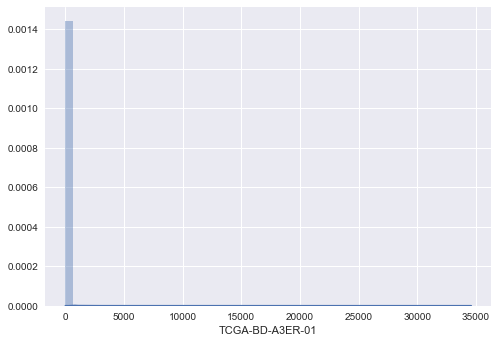

In [27]:
sns.distplot(matrix.iloc[:, 0]);

# Histogram of First Gene

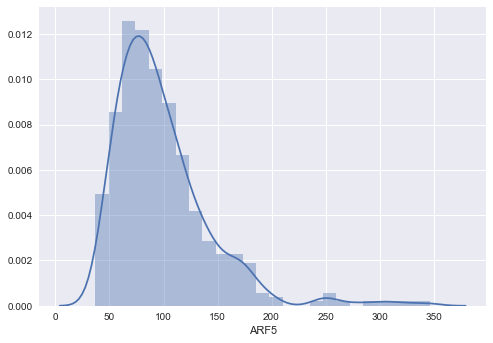

In [28]:
sns.distplot(matrix.iloc[0, :]);

# Save Unfiltered Matrix to File

In [29]:
filename = path+'tcga_lihc_matrix_unfilltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
matrix.to_csv(filename, sep='\t', compression='gzip')

# Filtered

In [30]:
normalized_matrix = matrix.copy()

In [31]:
normalized_matrix = normalized_matrix.groupby(level=0).max()

# Remove any data with more than 95% missing and imput remaining mssing values to matrix mean

In [32]:
normalized_matrix = mf.removeAndImpute(normalized_matrix)

In [33]:
normalized_matrix.head()

,TCGA-BD-A3ER-01,TCGA-G3-A3CG-01,TCGA-DD-A39V-01,TCGA-EP-A3JL-01,TCGA-DD-A3A1-01,TCGA-DD-A39W-01,TCGA-DD-A1EK-01,TCGA-CC-A3MA-01,TCGA-FV-A2QR-11,TCGA-FV-A3R2-01,...,TCGA-DD-AADS-01,TCGA-DD-AADK-01,TCGA-DD-AAD0-01,TCGA-DD-AACS-01,TCGA-DD-AACJ-01,TCGA-DD-AACD-01,TCGA-DD-AAEI-01,TCGA-DD-AAE7-01,TCGA-DD-AAVW-01,TCGA-CC-A123-01
A1BG,465.353000,756.693000,221.669000,541.026000,446.881000,944.078000,416.249000,54.120700,1246.090000,576.556000,...,172.127000,256.051000,959.301000,528.648000,301.389000,68.810700,549.760000,1362.140000,445.626000,299.187000
A1CF,11.009700,18.584600,14.568400,7.263230,7.779890,27.676100,11.406100,1.226740,17.155600,27.767800,...,4.915740,10.449500,10.960900,21.085400,8.180910,6.647530,18.241600,11.535000,23.791000,7.387410
A2M,397.973000,1119.790000,119.399000,182.198000,283.958000,4734.190000,291.095000,173.092000,983.998000,158.209000,...,39.801000,952.285000,17.261900,30.469000,490.531000,129.916000,245.388000,646.359000,284.093000,238.971000
A2ML1,0.012653,0.023993,0.036370,0.065780,0.017153,0.069819,0.085084,0.045492,0.012486,0.035984,...,0.022615,0.028572,0.029049,0.076152,0.038960,0.038960,0.038960,0.009683,0.045380,0.005333
A3GALT2,0.033839,0.033839,0.033839,0.033839,0.038255,0.033839,0.033839,0.033839,0.033839,0.033839,...,0.033839,0.033839,0.033839,0.033839,0.033839,0.033839,0.033839,0.033839,0.033839,0.033839


In [34]:
normalized_matrix.shape

(18842, 424)

# logCPM Transform

Raw counts were normalized to log10-Counts Per Million (logCPM) by dividing each column by the total sum of its counts, multiplying it by 106, followed by the application of a log10-transform.

In [35]:
samples = normalized_matrix.columns.tolist()

In [36]:
normalized_matrix.columns = np.arange(0, len(normalized_matrix.columns))

In [37]:
for col in normalized_matrix.columns:

    total = normalized_matrix[col].sum()
    
    normalized_matrix[col] = normalized_matrix[col].apply(lambda x: np.log10(((x)/total)*10**6))

In [38]:
normalized_matrix.columns = samples

In [39]:
normalized_matrix.head()

,TCGA-BD-A3ER-01,TCGA-G3-A3CG-01,TCGA-DD-A39V-01,TCGA-EP-A3JL-01,TCGA-DD-A3A1-01,TCGA-DD-A39W-01,TCGA-DD-A1EK-01,TCGA-CC-A3MA-01,TCGA-FV-A2QR-11,TCGA-FV-A3R2-01,...,TCGA-DD-AADS-01,TCGA-DD-AADK-01,TCGA-DD-AAD0-01,TCGA-DD-AACS-01,TCGA-DD-AACJ-01,TCGA-DD-AACD-01,TCGA-DD-AAEI-01,TCGA-DD-AAE7-01,TCGA-DD-AAVW-01,TCGA-CC-A123-01
A1BG,2.802048,3.023207,2.538799,2.876594,2.842365,3.118253,2.755205,1.893803,3.260745,2.921367,...,2.437533,2.550080,3.120269,2.956117,2.675016,2.066277,2.879682,3.301604,2.790426,2.701381
A1CF,1.176041,1.413441,1.356506,1.004506,1.083147,1.585350,1.192989,0.249192,1.399601,1.604067,...,0.893273,1.160849,1.178160,1.556932,1.108690,1.051282,1.400572,1.229399,1.517869,1.093931
A2M,2.734119,3.193424,2.270095,2.403920,2.645427,3.818491,2.599886,2.398717,3.158190,2.359756,...,1.801578,3.120521,1.375402,1.716808,2.886555,2.342284,2.529362,2.977856,2.594916,2.603784
A2ML1,-1.763555,-1.475626,-1.246167,-1.038530,-1.573479,-1.012780,-0.934301,-1.181623,-1.738371,-1.283367,...,-1.443916,-1.402305,-1.398548,-0.885367,-1.213496,-1.180763,-1.269876,-1.846608,-1.201678,-2.047552
A3GALT2,-1.336318,-1.326296,-1.277489,-1.327207,-1.225138,-1.327338,-1.334732,-1.310144,-1.305388,-1.310058,...,-1.268900,-1.328830,-1.332270,-1.237633,-1.274695,-1.241962,-1.331075,-1.303202,-1.329128,-1.245145


# Normalize Matrix (Quantile Normalize the matrix for the columns)

In [40]:
normalized_matrix = mf.quantileNormalize(normalized_matrix)

In [41]:
normalized_matrix.head()

,TCGA-BD-A3ER-01,TCGA-G3-A3CG-01,TCGA-DD-A39V-01,TCGA-EP-A3JL-01,TCGA-DD-A3A1-01,TCGA-DD-A39W-01,TCGA-DD-A1EK-01,TCGA-CC-A3MA-01,TCGA-FV-A2QR-11,TCGA-FV-A3R2-01,...,TCGA-DD-AADS-01,TCGA-DD-AADK-01,TCGA-DD-AAD0-01,TCGA-DD-AACS-01,TCGA-DD-AACJ-01,TCGA-DD-AACD-01,TCGA-DD-AAEI-01,TCGA-DD-AAE7-01,TCGA-DD-AAVW-01,TCGA-CC-A123-01
A1BG,2.951748,3.078166,2.489113,2.898978,2.753767,3.131067,2.886229,1.787601,3.288736,2.867866,...,2.450680,2.631137,3.178304,2.977116,2.653739,2.163748,2.824430,3.325619,2.818781,2.736416
A1CF,1.270227,1.399804,1.475797,1.143486,1.133993,1.575179,1.256034,-0.066385,1.403776,1.419292,...,1.208871,1.292330,1.121618,1.391946,1.181334,1.240861,1.466292,1.347939,1.514150,1.328325
A2M,2.849837,3.237434,2.270866,2.475124,2.567668,3.775802,2.707181,2.396385,3.163372,2.223927,...,1.954987,3.226119,1.327402,1.563132,2.829752,2.425189,2.516420,3.099732,2.619181,2.657826
A2ML1,-1.685853,-1.465449,-1.121959,-0.937411,-1.498992,-0.929189,-0.883876,-1.261917,-1.744381,-1.271927,...,-1.334179,-1.289026,-1.318748,-1.223225,-1.400986,-1.453568,-1.122207,-1.952894,-1.275832,-1.841786
A3GALT2,-1.278376,-1.308815,-1.156753,-1.226671,-1.139819,-1.252005,-1.306216,-1.386249,-1.317305,-1.301929,...,-1.151037,-1.222401,-1.247917,-1.629239,-1.486439,-1.544413,-1.188877,-1.340825,-1.403996,-1.117107


# Normalize Matrix (z-score the rows)

In [42]:
mf.zscore(normalized_matrix, 'row')

In [43]:
normalized_matrix.head()

,TCGA-BD-A3ER-01,TCGA-G3-A3CG-01,TCGA-DD-A39V-01,TCGA-EP-A3JL-01,TCGA-DD-A3A1-01,TCGA-DD-A39W-01,TCGA-DD-A1EK-01,TCGA-CC-A3MA-01,TCGA-FV-A2QR-11,TCGA-FV-A3R2-01,...,TCGA-DD-AADS-01,TCGA-DD-AADK-01,TCGA-DD-AAD0-01,TCGA-DD-AACS-01,TCGA-DD-AACJ-01,TCGA-DD-AACD-01,TCGA-DD-AAEI-01,TCGA-DD-AAE7-01,TCGA-DD-AAVW-01,TCGA-CC-A123-01
A1BG,0.209295,0.524725,-0.945036,0.077629,-0.284693,0.656720,0.045819,-2.695397,1.050122,0.000000,...,-1.040931,-0.590671,0.774580,0.272591,-0.534275,-1.756864,-0.108378,1.142150,-0.122474,-0.327984
A1CF,-0.556711,0.038403,0.387424,-1.138810,-1.182408,0.843867,-0.621897,-6.695485,0.056650,0.127912,...,-0.838508,-0.455198,-1.239241,0.002318,-0.964982,-0.691584,0.343772,-0.199798,0.563572,-0.289880
A2M,0.138112,0.939742,-1.059321,-0.636873,-0.445473,2.053199,-0.156930,-0.799721,0.786567,-1.156399,...,-1.712623,0.916341,-3.010599,-2.523060,0.096572,-0.740148,-0.551465,0.654945,-0.338933,-0.259007
A2ML1,-1.085083,-0.397179,0.674887,1.250881,-0.501870,1.276543,1.417969,0.238065,-1.267754,0.206823,...,0.012528,0.153456,0.060689,0.358826,-0.195985,-0.360097,0.674113,-1.918546,0.194635,-1.571767
A3GALT2,0.195441,-0.049948,1.175936,0.612276,1.312460,0.408040,-0.028991,-0.674198,-0.118389,0.005568,...,1.222024,0.646704,0.440999,-2.633131,-1.481908,-1.949278,0.916967,-0.308001,-0.817277,1.495553


# Merge Like Column (by taking the mean)

In [44]:
normalized_matrix = mf.merge(normalized_matrix, 'column', 'mean')

In [45]:
normalized_matrix.shape

(18842, 423)

# Map Gene Symbols To Up-to-date Approved Gene Symbols

In [46]:
mf.mapgenesymbols(normalized_matrix)

In [47]:
normalized_matrix.shape

# Merge Duplicate Genes By Rows

In [48]:
normalized_matrix = mf.merge(normalized_matrix, 'row', 'mean')

In [49]:
normalized_matrix.shape

(18339, 423)

# Histogram of First Sample

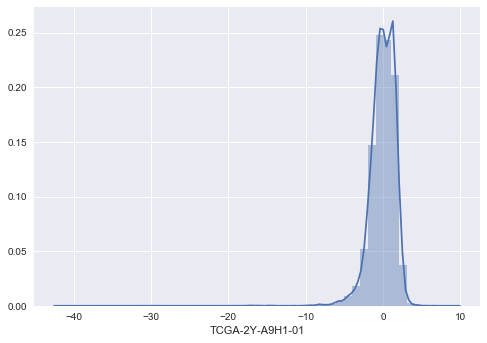

In [50]:
sns.distplot(normalized_matrix.iloc[:, 10]);

# Histogram of First Gene

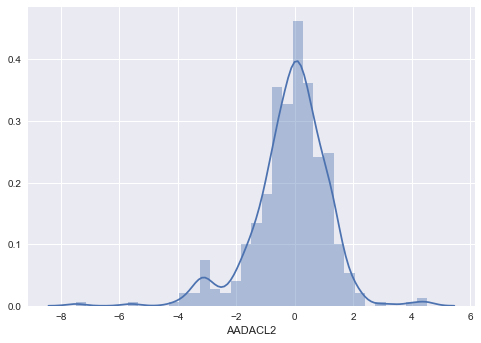

In [51]:
sns.distplot(normalized_matrix.iloc[10, :]);

# Save Filtered Matrix

In [52]:
filename = path+'tcga_lihc_matrix_filltered_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
normalized_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene List

In [53]:
gene_list = mf.createGeneList(normalized_matrix)

In [54]:
gene_list.head()

,GeneSym,GeneID
0,A1BG,1
1,A1CF,29974
2,A2M,2
3,A2ML1,144568
4,A3GALT2,127550


In [55]:
gene_list.shape

(18339, 2)

# Save Gene List

In [56]:
filename = path+'tcga_lihc_gene_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_list.to_csv(filename, sep='\t', compression='gzip')

# Create Attribute List

In [57]:
metaData = pd.DataFrame(index=normalized_matrix.columns)

for index in metaData.index:
    if ('-').join(index.split('-')[0:3]) in sample_meta.index:
        metaData.loc[index, 'Age'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'age_at_initial_pathologic_diagnosis']
        metaData.loc[index, 'Gender'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'gender']
        metaData.loc[index, 'Pathologic M'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_M']
        metaData.loc[index, 'Pathologic N'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_N']
        metaData.loc[index, 'Pathologic T'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_T']
        metaData.loc[index, 'Pathologic Stage'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'pathologic_stage']
        metaData.loc[index, 'Histological Type'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'histological_type']
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'tumor_tissue_site']
        metaData.loc[index, 'Neoplasm Histologic Grade'] = sample_meta.loc[('-').join(index.split('-')[0:3]), 'neoplasm_histologic_grade']
    else:
        metaData.loc[index, 'Age'] = np.nan
        metaData.loc[index, 'Gender'] = np.nan
        metaData.loc[index, 'Pathologic M'] = np.nan
        metaData.loc[index, 'Pathologic N'] = np.nan
        metaData.loc[index, 'Pathologic T'] = np.nan
        metaData.loc[index, 'Pathologic Stage'] = np.nan
        metaData.loc[index, 'Histological Type'] = np.nan
        metaData.loc[index, 'Sample Type'] = SampleTypes[str(index.split('-')[3])]
        metaData.loc[index, 'Tumor Tissue Site'] = np.nan
        metaData.loc[index, 'Neoplasm Histologic Grade'] = np.nan

In [58]:
attribute_list = mf.createAttributeList(normalized_matrix, metaData)

In [59]:
attribute_list.head()

,Age,Gender,Pathologic M,Pathologic N,Pathologic T,Pathologic Stage,Histological Type,Sample Type,Tumor Tissue Site,Neoplasm Histologic Grade
Attributes,,,,,,,,,,
TCGA-2V-A95S-01,NaN,MALE,MX,NX,T2,Stage II,Hepatocellular Carcinoma,Primary Solid Tumor,Liver,G3
TCGA-2Y-A9GS-01,58,MALE,MX,NX,T2,NaN,Hepatocellular Carcinoma,Primary Solid Tumor,Liver,G2
TCGA-2Y-A9GT-01,51,MALE,MX,NX,T1,Stage I,Hepatocellular Carcinoma,Primary Solid Tumor,Liver,G2
TCGA-2Y-A9GU-01,55,FEMALE,MX,NX,T1,Stage I,Hepatocellular Carcinoma,Primary Solid Tumor,Liver,G2
TCGA-2Y-A9GV-01,54,FEMALE,MX,NX,T1,Stage I,Hepatocellular Carcinoma,Primary Solid Tumor,Liver,G1


In [60]:
attribute_list.shape

(423, 10)

# Save Attribute List

In [61]:
filename = path+'tcga_lihc_attribute_list_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_list.to_csv(filename, sep='\t', compression='gzip')

# Create matrix of Standardized values (values between -1, and 1)

In [62]:
standard_matrix = mf.createStandardizedMatrix(normalized_matrix)

In [63]:
standard_matrix.head()

,TCGA-2V-A95S-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GW-01,TCGA-2Y-A9GX-01,TCGA-2Y-A9GY-01,TCGA-2Y-A9GZ-01,TCGA-2Y-A9H0-01,...,TCGA-ZP-A9CZ-01,TCGA-ZP-A9D0-01,TCGA-ZP-A9D1-01,TCGA-ZP-A9D2-01,TCGA-ZP-A9D4-01,TCGA-ZS-A9CD-01,TCGA-ZS-A9CE-01,TCGA-ZS-A9CF-01,TCGA-ZS-A9CF-02,TCGA-ZS-A9CG-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.428248,-0.116265,0.810659,-0.669265,0.886394,0.753824,0.053878,-0.291213,0.242995,-0.277035,...,-0.744856,-0.177773,0.848511,-0.919757,0.342287,0.436859,0.971656,-0.480228,-0.730698,-0.499105
A1CF,-0.672364,-0.341545,0.585156,0.419572,0.864374,-0.497476,0.027176,-0.161933,0.542590,-0.426600,...,-0.729053,0.717634,0.069660,-0.733785,0.485799,-0.558941,0.282445,0.523649,0.921241,0.594620
A2M,0.966973,-0.276986,-0.560531,0.867503,-0.721207,-0.173009,0.162666,-0.688100,0.938559,-0.820451,...,0.384846,0.370658,0.016127,0.839100,-0.782670,0.044471,-0.584151,-0.333666,-0.139910,-0.716467
A2ML1,-0.682247,0.693485,-0.346722,-0.238037,0.698250,0.177970,0.925493,-0.190735,0.532665,-0.157673,...,0.371773,0.764473,0.206345,0.598855,0.627261,0.646166,-0.100952,0.963378,0.731329,0.859146
A3GALT2,0.939071,0.924877,-0.531635,-0.129914,-0.446616,-0.290656,-0.801058,-0.668715,-0.191363,0.030812,...,-0.323724,0.030812,-0.375718,-0.073174,0.361740,-0.583651,0.735448,-0.413469,-0.389863,0.139553


# Plot of A Single Celltype, Normalized Value vs. Standardized Value

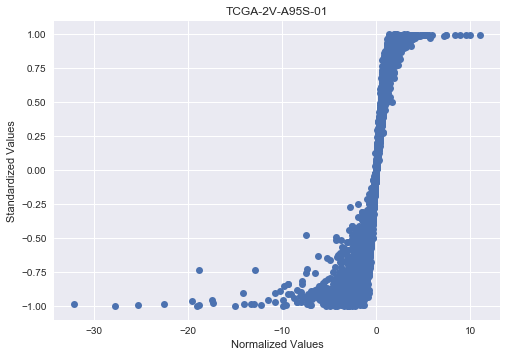

In [64]:
plt.plot(normalized_matrix[normalized_matrix.columns[0]], standard_matrix[standard_matrix.columns[0]], 'bo')
plt.xlabel('Normalized Values')
plt.ylabel('Standardized Values')
plt.title(standard_matrix.columns[0])
plt.grid(True)

# Save Standardized Matrix

In [65]:
filename = path+'tcga_lihc_standard_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
standard_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Tertiary Matrix

In [66]:
tertiary_matrix = mf.createTertiaryMatrix(standard_matrix)

In [67]:
tertiary_matrix.head()

,TCGA-2V-A95S-01,TCGA-2Y-A9GS-01,TCGA-2Y-A9GT-01,TCGA-2Y-A9GU-01,TCGA-2Y-A9GV-01,TCGA-2Y-A9GW-01,TCGA-2Y-A9GX-01,TCGA-2Y-A9GY-01,TCGA-2Y-A9GZ-01,TCGA-2Y-A9H0-01,...,TCGA-ZP-A9CZ-01,TCGA-ZP-A9D0-01,TCGA-ZP-A9D1-01,TCGA-ZP-A9D2-01,TCGA-ZP-A9D4-01,TCGA-ZS-A9CD-01,TCGA-ZS-A9CE-01,TCGA-ZS-A9CF-01,TCGA-ZS-A9CF-02,TCGA-ZS-A9CG-01
,,,,,,,,,,,,,,,,,,,,,
A1BG,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
A1CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2M,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
A2ML1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
A3GALT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Save Teriary Matrix

In [68]:
filename = path+'tcga_lihc_tertiary_matrix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
tertiary_matrix.to_csv(filename, sep='\t', compression='gzip')

# Create Up Gene Set Library

In [69]:
name = 'tcga_lihc_gene_up_set'

In [70]:
mf.createUpGeneSetLib(tertiary_matrix, path, name)

# Create Down Gene Set Library

In [71]:
name = 'tcga_lihc_gene_down_set'

In [72]:
mf.createDownGeneSetLib(tertiary_matrix, path, name)

# Create Up Attribute Library

In [73]:
name = 'tcga_lihc_attribute_up_set'

In [74]:
mf.createUpAttributeSetLib(tertiary_matrix, path, name)

# Create Down Attribute Library

In [75]:
name = 'tcga_lihc_attribute_down_set'

In [76]:
mf.createDownAttributeSetLib(tertiary_matrix, path, name)

# Create Attribute Similarity Matrix

In [77]:
attribute_normalized_matrix = normalized_matrix.copy()

In [78]:
getSampleData(attribute_normalized_matrix, sample_meta, SampleTypes)

In [79]:
attribute_similarity_matix = mf.createSimilarityMatrix(attribute_normalized_matrix.T, 'cosine')

In [80]:
attribute_similarity_matix.head()

,"(Donor:TCGA-2V-A95S, Age:nan, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG3)","(Donor:TCGA-2Y-A9GS, Age:58.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG2)","(Donor:TCGA-2Y-A9GT, Age:51.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG2)","(Donor:TCGA-2Y-A9GU, Age:55.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG2)","(Donor:TCGA-2Y-A9GV, Age:54.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG1)","(Donor:TCGA-2Y-A9GW, Age:64.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG2)","(Donor:TCGA-2Y-A9GX, Age:68.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage I, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG2)","(Donor:TCGA-2Y-A9GY, Age:64.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG3)","(Donor:TCGA-2Y-A9GZ, Age:82.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG2)","(Donor:TCGA-2Y-A9H0, Age:49.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage IIIA, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG1)",...,"(Donor:TCGA-ZP-A9CZ, Age:72.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG1)","(Donor:TCGA-ZP-A9D0, Age:67.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG1)","(Donor:TCGA-ZP-A9D1, Age:56.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG2)","(Donor:TCGA-ZP-A9D2, Age:51.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG2)","(Donor:TCGA-ZP-A9D4, Age:64.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG1)","(Donor:TCGA-ZS-A9CD, Age:73.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG2)","(Donor:TCGA-ZS-A9CE, Age:79.0, Gender:FEMALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG1)","(Donor:TCGA-ZS-A9CF, Age:64.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG2)","(Donor:TCGA-ZS-A9CF, Age:64.0, Gender:MALE, SampleType:Recurrent Solid Tumor, Stage:Stage II, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG2)","(Donor:TCGA-ZS-A9CG, Age:55.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG2)"
,,,,,,,,,,,,,,,,,,,,,
"(Donor:TCGA-2V-A95S, Age:nan, Gender:MALE, SampleType:Primary Solid Tumor, Stage:Stage II, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG3)",1.000000,0.083366,0.035160,-0.048186,-0.039232,0.186527,0.123908,0.267178,-0.086431,0.075631,...,0.117905,-0.071262,0.071475,0.109090,-0.098801,0.116633,-0.089561,-0.007202,0.010013,-0.067753
"(Donor:TCGA-2Y-A9GS, Age:58.0, Gender:MALE, SampleType:Primary Solid Tumor, Stage:nan, Histology:Hepatocellular Carcinoma, Tissue:Liver, Tumor:nan, GradeG2)",0.083366,1.000000,0.182750,0.032088,0.209967,0.152800,0.215003,0.132158,0.167002,0.119064,...,0.157779,0.031982,0.150278,0.258278,0.047089,0.009981,0.057145,0.145475,0.172436,0.022777
"(Donor:TCG

# Save Attribute Similarity Matrix

In [81]:
filename = path+'tcga_lihc_attribute_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
attribute_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# HeatMap (clustergrammer) of Similarity Matrix

In [82]:
net.load_df(attribute_similarity_matix.iloc[:,:].copy())
# net.filter_N_top('row', rank_type='sum', N_top=300)
net.cluster()
net.widget()

# Create Gene Similarity Matrix

In [83]:
gene_similarity_matix = mf.createSimilarityMatrix(normalized_matrix, 'cosine')

In [84]:
gene_similarity_matix.head()

,A1BG,A1CF,A2M,A2ML1,A3GALT2,A4GALT,A4GNT,AAAS,AACS,AADAC,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
,,,,,,,,,,,,,,,,,,,,,
A1BG,1.000000,0.489212,0.276967,-0.116302,0.146379,-0.230452,0.056361,-0.158481,-0.265365,0.540666,...,-0.301432,-0.195723,0.149033,0.237820,0.255519,0.082328,0.231768,-0.128214,-0.000418,0.021146
A1CF,0.489212,1.000000,0.183265,-0.140481,0.075064,-0.378696,0.014089,-0.076237,-0.145303,0.638157,...,-0.107932,-0.097191,0.190961,0.275912,0.295029,0.197008,0.343043,-0.303522,-0.071236,0.135042
A2M,0.276967,0.183265,1.000000,-0.110211,0.075846,0.016795,-0.019229,-0.161698,-0.018080,0.198806,...,-0.154718,-0.055730,0.030075,-0.012706,0.081606,-0.165031,-0.076726,0.005688,0.211291,0.107644
A2ML1,-0.116302,-0.140481,-0.110211,1.000000,-0.051983,0.123955,-0.007424,-0.071937,0.057331,-0.105506,...,0.058922,0.020741,0.055635,0.059481,-0.020218,0.022372,0.032876,0.067840,0.037777,0.129033
A3GALT2,0.146379,0.075064,0.075846,-0.051983,1.000000,-0.096788,0.070593,0.071611,-0.103504,0.074660,...,-0.147997,0.033218,0.020519,-0.013211,0.104142,-0.023689,0.001863,-0.073785,-0.043785,-0.134290


# Save Gene Similarity Matrix

In [85]:
filename = path+'tcga_lihc_gene_similarity_matix_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
gene_similarity_matix.to_csv(filename, sep='\t', compression='gzip')

# Create Gene-Attribute Edge List

In [86]:
name = 'tcga_lihc_gene_attribute_edge_list'

In [87]:
mf.createGeneAttributeEdgeList(standard_matrix, attribute_list, gene_list, path, name)

Progeres: 100%  423 Out of 423   

 The number of statisticaly relevent gene-attribute associations is: 387737
